In [127]:
from functions import *
from bayes_opt import BayesianOptimization

In [128]:
n=7
T=0.1
t_max=10
interpolator_kind='cubic'

In [129]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    n_random_models = 1

    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [130]:
pbounds = {'x1': (0,4), 'x2': (0,4), 'x3': (0,4)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [131]:
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------
| 1         | 0.001876  | 1.668     | 2.881     | 0.0004575 |
| 2         | 0.01437   | 1.209     | 0.587     | 0.3694    |
| 3         | 0.01961   | 0.745     | 1.382     | 1.587     |
| 4         | 0.02763   | 2.155     | 1.677     | 2.741     |
| 5         | 0.004984  | 0.8178    | 3.512     | 0.1096    |
| 6         | 0.02687   | 2.682     | 1.669     | 2.235     |
| 7         | 0.0002173 | 0.5615    | 0.7924    | 3.203     |
| 8         | 0.01195   | 3.873     | 1.254     | 2.769     |
| 9         | 0.007432  | 3.506     | 3.578     | 0.3402    |
| 10        | 0.001943  | 0.1562    | 0.6793    | 3.513     |
| 11        | 0.006209  | 2.235     | 2.637     | 2.521     |
| 12        | 0.05671   | 2.152     | 1.152     | 2.229     |
| 13        | 0.00478   | 2.197     | 0.6811    | 2.12      |
| 14        | 0.001252  | 0.9101    | 0.6224    | 3.789     |
| 15    

In [132]:
print(optimizer.max)

{'target': 0.05671351665732349, 'params': {'x1': 2.152105271416276, 'x2': 1.1518184932093154, 'x3': 2.228904134813132}}


In [133]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.0567


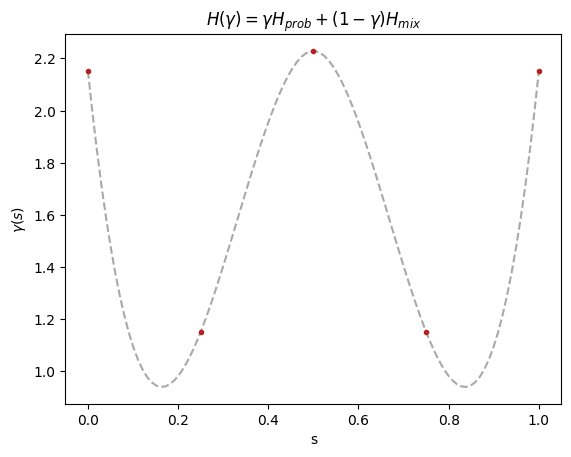

In [134]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [135]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': 1
          }

save_in_json(ra_exp, f'n{n}_{interpolator_kind}_BO.json')